# **Spit some [tensor] flow**

Practice makes perfect

`Let's get this over with`


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
data = np.array([[0,0,0], [0,1,0], [1,0,0], [1,1,1]])
print(data)
print(data.shape)


[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]
(4, 3)


In [0]:
X = data[:,0:2]
y = data[:,2]
print(X.shape)
print(y.shape)

(4, 2)
(4,)


In [0]:
N, D = X.shape

In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

In [0]:
i_layer = Input(shape = (D,))
h_layer = Dense(8, activation='relu')(i_layer)
h_layer = Dense(4, activation='relu')(h_layer)
o_layer = Dense(1, activation='sigmoid')(h_layer)
model = Model(i_layer, o_layer)

In [0]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='binary_crossentropy',
    metrics = ['accuracy'])

In [0]:
report = model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7050 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 953us/step - loss: 0.6305 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.5867 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2083 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0820 - accuracy: 1.0000
Epoch 11/100
1/1 [=========

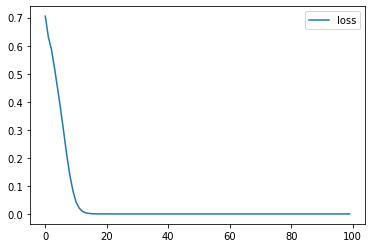

In [0]:
plt.plot(report.history['loss'], label="loss")
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


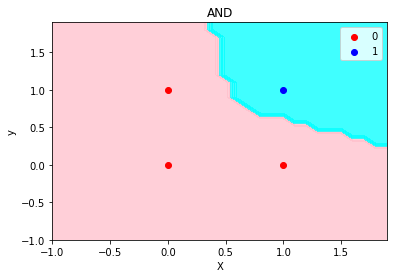

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                  np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape) > 0.5,
          alpha = 0.75, cmap = ListedColormap(('pink', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title("AND")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()